# ANÁLISIS DE ENFERMEDADES DEL CORAZÓN

**Fuente: Datos extraidos de la pagina Kaggle**
- Autor: Luis Edgar Gutierrez Saldaña 

**https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression**

#### 1 Cargando librerias

In [ ]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#~~~~~~~~~~~~~~~~~~~#
# librerias basicas #
#~~~~~~~~~~~~~~~~~~~#
import pandas as pd 
import numpy as np
#~~~~~~~~~~~~~~~#
# visualizacion #
#~~~~~~~~~~~~~~~#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~#
# analisis exploratorio #
#~~~~~~~~~~~~~~~~~~~~~~~#
from collections import Counter
import pandas_profiling as pp

#~~~~~~~~~~~~~~~~~~#
# preprocesamiento #
#~~~~~~~~~~~~~~~~~~#
from sklearn.preprocessing import StandardScaler
#~~~~~~~~~~~#
# particion #
#~~~~~~~~~~~#
from sklearn.model_selection import train_test_split
#~~~~~~~~~~#
# metricas #
#~~~~~~~~~~#
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
#~~~~~~~~~#
# modelos #
#~~~~~~~~~#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#~~~~~~~~~~~~~~~~~~~~~~~~#
# seleccion de variables #
#~~~~~~~~~~~~~~~~~~~~~~~~#
from featurewiz import featurewiz
#~~~~~~~~~~#
# emsamble #
#~~~~~~~~~~#
import six 
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

#### 2 Cargando Datos

In [ ]:
#------#
# ruta #
#------#

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/13 PROYECTOS/5 proyecto- Heart Disease Ensemble Classifier/EnfermedadCardioVasculares.csv")

In [ ]:
d.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
d.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
d.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
d.rename(columns={'male':"sexo",
                  'age':"edad",
                  'education':"educacion",
                  "currentSmoker":"fumador",
                  "cigsPerDay":"cigarros_por_dia",
                  'BPMeds':"toma_medicamentos",
                  'prevalentStroke':"ictus_prevalente",
                  "diabetes":'diabetes',
                  'totChol':"nivel_de_colesterol",
                  'sysBP':"presion_arterial_sistolica",
                  'diaBP':"presion_arterial_diastolica",
                  'BMI':"imc",
                  'heartRate':"frecuencia_cardiaca",
                  'glucose':"glucosa",
                  'TenYearCHD':"target"},inplace=True)

In [ ]:
type(d)

pandas.core.frame.DataFrame

In [ ]:
d.dtypes

sexo                             int64
edad                             int64
educacion                      float64
fumador                          int64
cigarros_por_dia               float64
toma_medicamentos              float64
ictus_prevalente                 int64
prevalentHyp                     int64
diabetes                         int64
nivel_de_colesterol            float64
presion_arterial_sistolica     float64
presion_arterial_diastolica    float64
imc                            float64
frecuencia_cardiaca            float64
glucosa                        float64
target                           int64
dtype: object

In [ ]:
d.sexo.value_counts() 

0    2419
1    1819
Name: sexo, dtype: int64

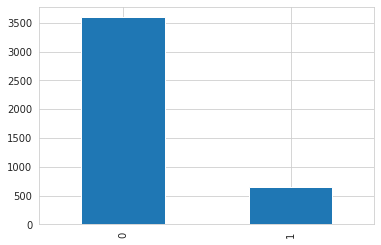

In [ ]:
d.target.value_counts().plot.bar()

In [ ]:
d.dtypes.value_counts() 

float64    9
int64      7
dtype: int64

In [ ]:
d.shape

(4238, 16)

In [ ]:
d.nunique()

sexo                              2
edad                             39
educacion                         4
fumador                           2
cigarros_por_dia                 33
toma_medicamentos                 2
ictus_prevalente                  2
prevalentHyp                      2
diabetes                          2
nivel_de_colesterol             248
presion_arterial_sistolica      234
presion_arterial_diastolica     146
imc                            1363
frecuencia_cardiaca              73
glucosa                         143
target                            2
dtype: int64

In [ ]:
#------------------------------------#
# discretizacion de la variable edad #
#------------------------------------#

# continuo a categorico


#x = d.edad
#s = pd.Series(x)
edad= pd.cut (d.edad, bins = [30,45,60,75],labels=['edad_c1','edad_c2','edad_c3'])
d['edad']=edad

In [ ]:
# comentario:
#------------

# Por el cardinal podemos intuir que la variable debe ser cualitativa(float64 >> int64)


In [ ]:
#------------------------------------#
# lista numericas y lista categorica #
#------------------------------------#

In [ ]:
#******************#
# lista categorica #
#******************#
lista_numericas=[]
lista_categoricas=[]
for i in d.columns:
    if d[i].nunique() <=4:
       lista_categoricas.append(i)
    else:  
       lista_numericas.append(i)

In [ ]:
print('lista categoricas',(lista_categoricas))
print("lista categoricas",len(lista_categoricas))
print('lista numericas',(lista_numericas))
print("lista categoricas",len(lista_numericas))

lista categoricas ['sexo', 'edad', 'educacion', 'fumador', 'toma_medicamentos', 'ictus_prevalente', 'prevalentHyp', 'diabetes', 'target']
lista categoricas 9
lista numericas ['cigarros_por_dia', 'nivel_de_colesterol', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa']
lista categoricas 7


In [ ]:
#------------#
# comentario #
#------------#
# la variable educacion debe ser cualitativa !

In [ ]:
#--------------------------------------------------------------#
# valores perdidos de las listas_numericas y lista_categoricas #
#--------------------------------------------------------------#

#### 3 Analisis Exploratorio

In [ ]:
d[lista_numericas].isna().sum()

cigarros_por_dia                29
nivel_de_colesterol             50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glucosa                        388
dtype: int64

In [ ]:
d[lista_categoricas].isna().sum()

sexo                   0
edad                   0
educacion            105
fumador                0
toma_medicamentos     53
ictus_prevalente       0
prevalentHyp           0
diabetes               0
target                 0
dtype: int64

In [ ]:
#------------------#
# preprocesamiento #
#------------------# 

7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3091a5b5d0>,
      dtype=object)

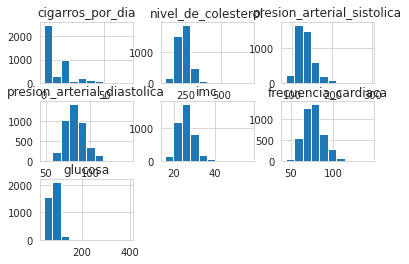

In [ ]:
# histograma #
#------------# 
print(len(d[lista_numericas].columns))
d[lista_numericas].hist()

In [ ]:
d[lista_numericas].columns

Index(['cigarros_por_dia', 'nivel_de_colesterol', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'],
      dtype='object')

Text(0.5, 1.0, 'cigarros_por_dia')

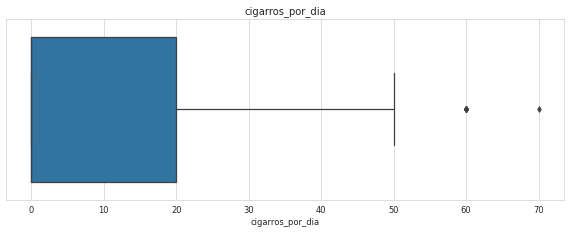

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['cigarros_por_dia'])
plt.title('cigarros_por_dia')

Text(0.5, 1.0, 'nivel_de_colesterol')

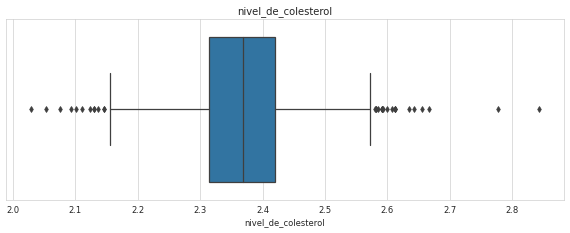

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(np.log10(d['nivel_de_colesterol']))
plt.title('nivel_de_colesterol')

Text(0.5, 1.0, 'presion_arterial_sistolica')

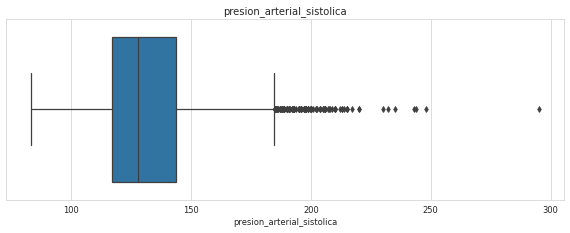

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['presion_arterial_sistolica'])
plt.title('presion_arterial_sistolica')

Text(0.5, 1.0, 'presion_arterial_diastolica')

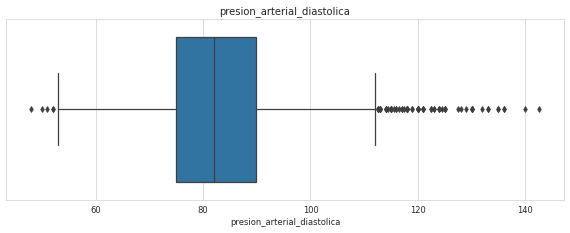

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['presion_arterial_diastolica'])
plt.title('presion_arterial_diastolica')

Text(0.5, 1.0, 'imc')

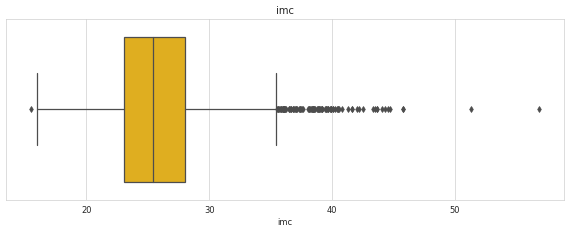

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot((d['imc']),data=d,palette="Wistia_r")#np.log10
plt.title('imc')

In [ ]:
print(d.imc.mean())
print(d.imc.median())
print(d.imc.mode()[0])

25.80200758473572
25.4
22.19


Text(0.5, 1.0, 'frecuencia_cardiaca')

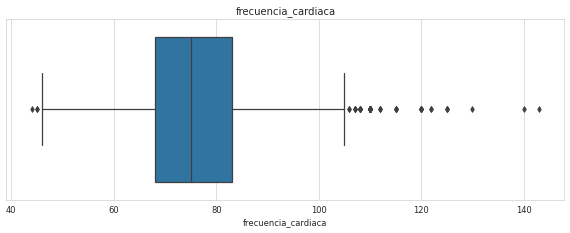

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['frecuencia_cardiaca'])
plt.title('frecuencia_cardiaca')

In [ ]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para

In [ ]:
d.columns

Index(['sexo', 'edad', 'educacion', 'fumador', 'cigarros_por_dia',
       'toma_medicamentos', 'ictus_prevalente', 'prevalentHyp', 'diabetes',
       'nivel_de_colesterol', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'target'],
      dtype='object')

Text(0.5, 1.0, 'sexo vs imc')

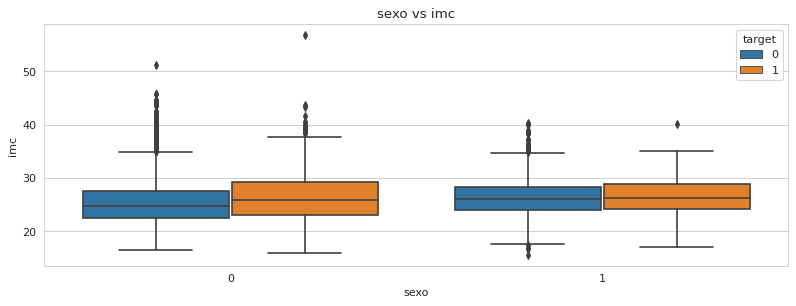

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='sexo',y='imc',hue='target',data=d)
plt.title('sexo vs imc')

Text(0.5, 1.0, 'sexo vs presion_arterial_sistolica')

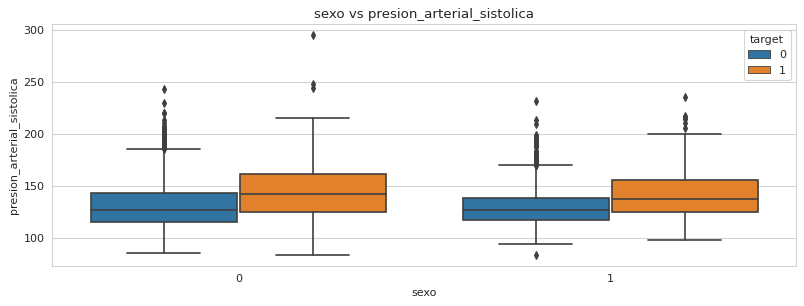

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='sexo',y='presion_arterial_sistolica',hue='target',data=d)
plt.title('sexo vs presion_arterial_sistolica')

Text(0.5, 1.0, 'sexo vs cigarros_por_dia')

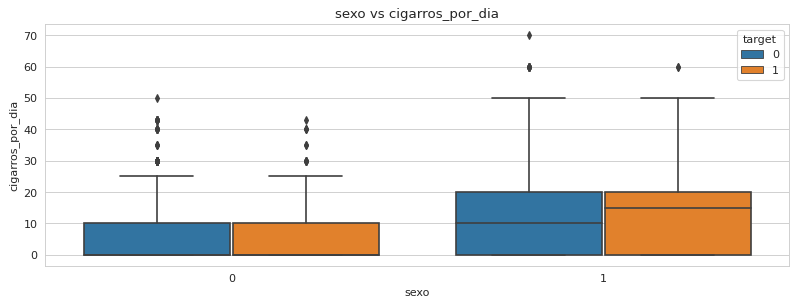

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='sexo',y='cigarros_por_dia',hue='target',data=d)
plt.title('sexo vs cigarros_por_dia')

Text(0.5, 1.0, 'edad vs presion_arterial_sistolica')

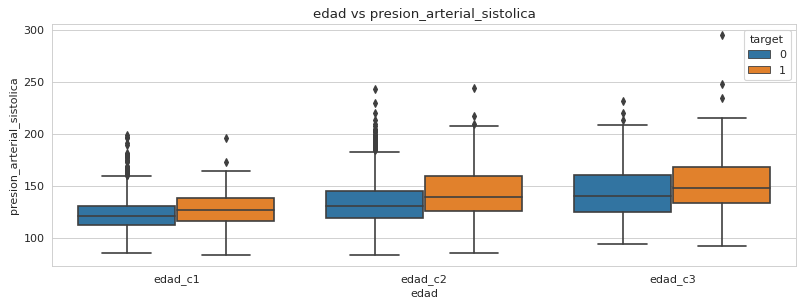

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='edad',y='presion_arterial_sistolica',hue='target',data=d)
plt.title('edad vs presion_arterial_sistolica')

Text(0.5, 1.0, 'edad vs imc')

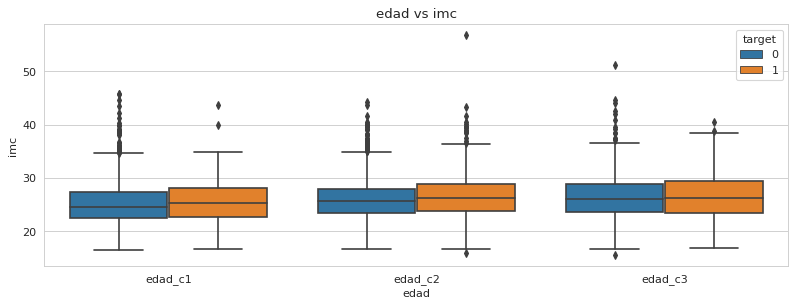

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='edad',y='imc',hue='target',data=d)
plt.title('edad vs imc')

##### Variable Edad

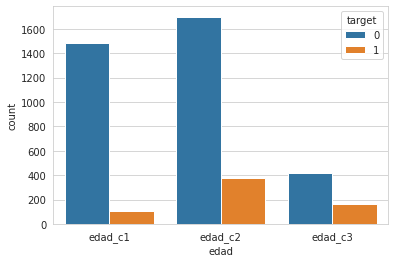

In [ ]:
sns.countplot(x='edad',hue='target',data=d)

##### Variable Sexo


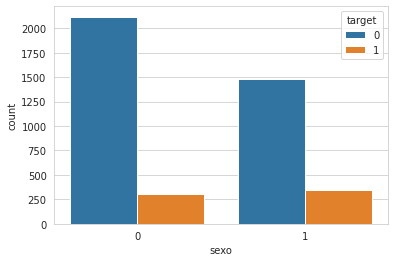

In [ ]:
sns.countplot(x='sexo',hue='target',data=d)

##### Variable Educacion

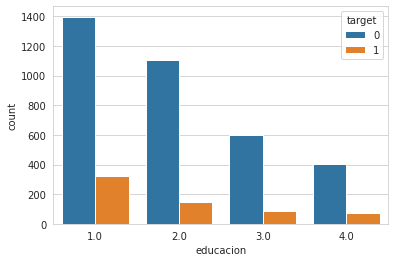

In [ ]:
sns.countplot (x='educacion',hue='target',data=d)

##### Variable Fumador

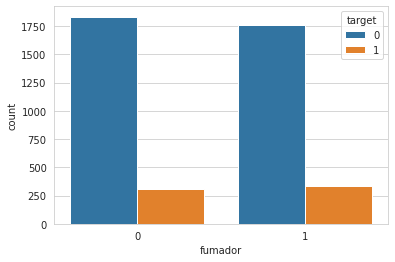

In [ ]:
sns.countplot(x='fumador',hue='target',data=d)

##### Variable toma medicamentos

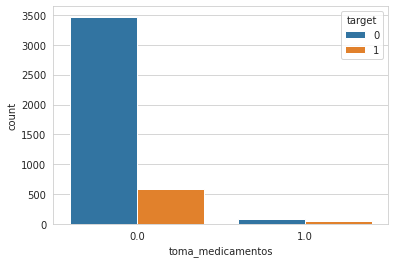

In [ ]:
sns.countplot(x='toma_medicamentos',hue='target',data=d)

##### Variable ictus prevalente

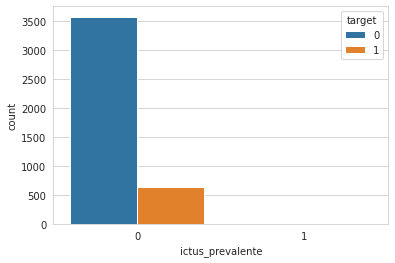

In [ ]:
sns.countplot(x='ictus_prevalente',hue='target',data=d)

##### Variable prevalentHyp

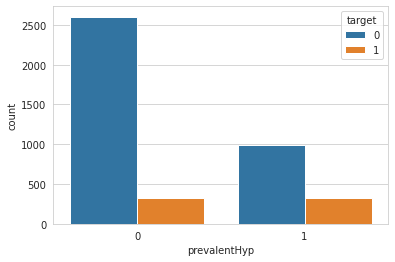

In [ ]:
sns.countplot(x='prevalentHyp',hue='target',data=d)

##### Variable diabetes

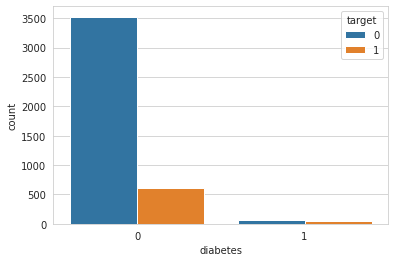

In [ ]:
sns.countplot(x='diabetes',hue='target',data=d)

##### Matriz de correlaciones

In [ ]:
d.dtypes

sexo                              int64
edad                           category
educacion                       float64
fumador                           int64
cigarros_por_dia                float64
toma_medicamentos               float64
ictus_prevalente                  int64
prevalentHyp                      int64
diabetes                          int64
nivel_de_colesterol             float64
presion_arterial_sistolica      float64
presion_arterial_diastolica     float64
imc                             float64
frecuencia_cardiaca             float64
glucosa                         float64
target                            int64
dtype: object

In [ ]:
corr_df = d.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,sexo,educacion,fumador,cigarros_por_dia,toma_medicamentos,ictus_prevalente,prevalentHyp,diabetes,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target
sexo,1.000000,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
educacion,0.017352,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
fumador,0.197596,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigarros_por_dia,0.317930,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
toma_medicamentos,-0.052506,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
ictus_prevalente,-0.004546,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
nivel_de_colesterol,-0.070322,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184
presion_arterial_sistolica,-0.035989,-0.129631,-0.130230,-0.088780,0.254219,0.057009,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621,0.216429


#### 4 Tratamiento de Valores Perdidos

In [ ]:
d[lista_numericas].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cigarros_por_dia,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
nivel_de_colesterol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
presion_arterial_sistolica,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
presion_arterial_diastolica,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
imc,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
frecuencia_cardiaca,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0
glucosa,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.000,394.0


In [ ]:
d.glucosa.isnull().sum()

388

In [ ]:
#---------#
# mediana #
#---------#
for i in d[lista_numericas]:
  if d[i].isnull().sum()<d.shape[0]:
     d[i]=d[i].fillna(d[i].median())


In [ ]:
d[lista_numericas].isnull().sum()

cigarros_por_dia               0
nivel_de_colesterol            0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glucosa                        0
dtype: int64

In [ ]:
 d[lista_categoricas].isnull().any()

sexo                 False
edad                 False
educacion             True
fumador              False
toma_medicamentos     True
ictus_prevalente     False
prevalentHyp         False
diabetes             False
target               False
dtype: bool

In [ ]:
#------#
# moda #
#------#
lista_nulos_categoricas=[]
for i in d[lista_categoricas]:
  if d[i].isnull().any()==True:
    lista_nulos_categoricas.append(i)
d[lista_nulos_categoricas].isnull().sum()    

educacion            105
toma_medicamentos     53
dtype: int64

In [ ]:
for i in d[lista_nulos_categoricas]:
  d[i]=d[i].fillna(d[i].mode()[0])

In [ ]:
d[lista_categoricas].isnull().sum()

sexo                 0
edad                 0
educacion            0
fumador              0
toma_medicamentos    0
ictus_prevalente     0
prevalentHyp         0
diabetes             0
target               0
dtype: int64

In [ ]:
#------------------#
# data total final #
#------------------#
d.isnull().sum()

sexo                           0
edad                           0
educacion                      0
fumador                        0
cigarros_por_dia               0
toma_medicamentos              0
ictus_prevalente               0
prevalentHyp                   0
diabetes                       0
nivel_de_colesterol            0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glucosa                        0
target                         0
dtype: int64

In [ ]:
d.target.value_counts()

0    3594
1     644
Name: target, dtype: int64

In [ ]:
 
d.target.dtypes
# convirtiendo de numerico a categorico
#
#d.target=d.target.map({0:'0',
#                     0:'1'})


dtype('int64')

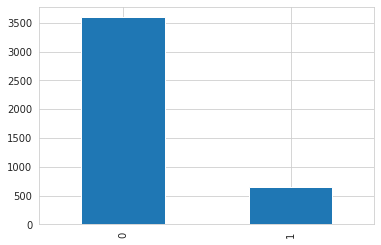

In [ ]:
d.target.value_counts().plot.bar()

In [ ]:
lista_numericas

['cigarros_por_dia',
 'nivel_de_colesterol',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa']

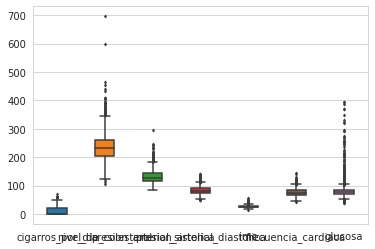

In [ ]:
#---------#
# seaborn #
#---------#
sns.boxplot(data = d[lista_numericas],orient="v",fliersize=2,saturation=.90, width=0.4)

In [ ]:
d[lista_categoricas].columns

Index(['sexo', 'edad', 'educacion', 'fumador', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'target'],
      dtype='object')

#### 5 Tratamiento de Outliers

##### variable glucosa !! 

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["glucosa"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["glucosa"],1)
cuantil_1

cuantil_95= np.percentile(d["glucosa"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["glucosa"],1)
cuantil_95 = np.percentile(d["glucosa"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["glucosa"]<cuantil_1,"glucosa"] = cuantil_1
d.loc[d["glucosa"]>cuantil_95,"glucosa"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["glucosa"]).transpose()

56.0
107.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,56.0,56.0,62.0,66.0,70.0,74.0,76.0,78.0,80.0,84.0,88.0,97.0,100.0,107.0,107.0,107.0,107.0


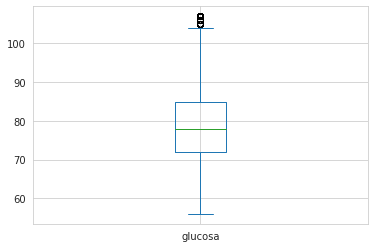

In [ ]:
d.glucosa.plot(kind="box")

In [ ]:
d.columns

Index(['sexo', 'edad', 'educacion', 'fumador', 'cigarros_por_dia',
       'toma_medicamentos', 'ictus_prevalente', 'prevalentHyp', 'diabetes',
       'nivel_de_colesterol', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'target'],
      dtype='object')

##### variable frecuencia_cardiaca

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["frecuencia_cardiaca"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["frecuencia_cardiaca"],1)
cuantil_1

cuantil_95= np.percentile(d["frecuencia_cardiaca"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["frecuencia_cardiaca"],1)
cuantil_95 = np.percentile(d["frecuencia_cardiaca"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["frecuencia_cardiaca"]<cuantil_1,"frecuencia_cardiaca"] = cuantil_1
d.loc[d["frecuencia_cardiaca"]>cuantil_95,"frecuencia_cardiaca"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["frecuencia_cardiaca"]).transpose()

52.0
98.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,52.0,52.0,60.0,60.0,65.0,70.0,72.0,75.0,77.0,80.0,85.0,92.0,95.0,98.0,98.0,98.0,98.0


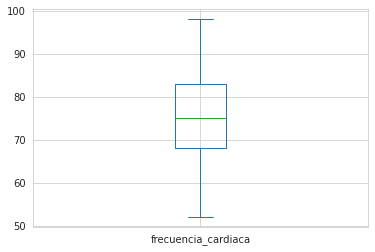

In [ ]:
d.frecuencia_cardiaca.plot(kind="box")

##### variable imc

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["imc"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["imc"],1)
cuantil_1

cuantil_95= np.percentile(d["imc"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["imc"],1)
cuantil_95 = np.percentile(d["imc"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["imc"]<cuantil_1,"imc"] = cuantil_1
d.loc[d["imc"]>cuantil_95,"imc"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["imc"]).transpose()

18.1674
32.771499999999996


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0000,1.000000,5.00,10.0,20.00,30.00,40.00,50.0,60.00,70.000,80.00,90.000,92.50000,95.000000,97.5000,99.0000,100.0000
Valor_Cuantil,18.1674,18.172062,20.06,21.1,22.53,23.58,24.49,25.4,26.33,27.399,28.68,30.763,31.62225,32.770225,32.7715,32.7715,32.7715


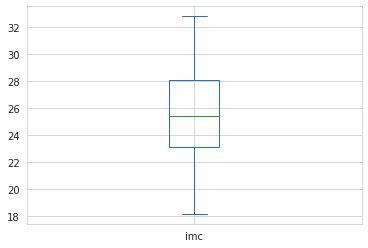

In [ ]:
d.imc.plot(kind="box")

##### variable presion_arterial_diastolica

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["presion_arterial_diastolica"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["presion_arterial_diastolica"],1)
cuantil_1

cuantil_95= np.percentile(d["presion_arterial_diastolica"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["presion_arterial_diastolica"],1)
cuantil_95 = np.percentile(d["presion_arterial_diastolica"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["presion_arterial_diastolica"]<cuantil_1,"presion_arterial_diastolica"] = cuantil_1
d.loc[d["presion_arterial_diastolica"]>cuantil_95,"presion_arterial_diastolica"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["presion_arterial_diastolica"]).transpose()

60.0
104.57499999999982


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.00000,97.500,99.000,100.000
Valor_Cuantil,60.0,60.0,66.0,69.0,73.0,76.0,80.0,82.0,85.0,87.5,92.0,98.0,100.5,104.51125,104.575,104.575,104.575


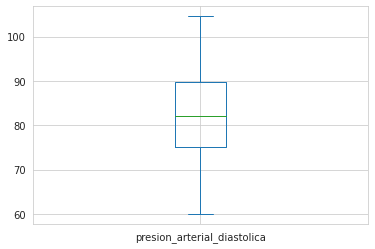

In [ ]:
d.presion_arterial_diastolica.plot(kind="box")

##### variable presion_arterial_sistolica

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["presion_arterial_sistolica"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["presion_arterial_sistolica"],1)
cuantil_1

cuantil_95= np.percentile(d["presion_arterial_sistolica"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["presion_arterial_sistolica"],1)
cuantil_95 = np.percentile(d["presion_arterial_sistolica"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["presion_arterial_sistolica"]<cuantil_1,"presion_arterial_sistolica"] = cuantil_1
d.loc[d["presion_arterial_sistolica"]>cuantil_95,"presion_arterial_sistolica"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["presion_arterial_sistolica"]).transpose()

97.0
175.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.00,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,97.0,97.0,104.0,108.85,114.0,119.5,124.0,128.0,133.0,140.0,148.0,162.0,167.5,175.0,175.0,175.0,175.0


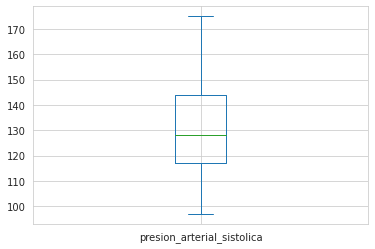

In [ ]:
d.presion_arterial_sistolica.plot(kind="box")

##### variable nivel_de_colesterol

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["nivel_de_colesterol"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["nivel_de_colesterol"],1)
cuantil_1

cuantil_95= np.percentile(d["nivel_de_colesterol"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["nivel_de_colesterol"],1)
cuantil_95 = np.percentile(d["nivel_de_colesterol"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["nivel_de_colesterol"]<cuantil_1,"nivel_de_colesterol"] = cuantil_1
d.loc[d["nivel_de_colesterol"]>cuantil_95,"nivel_de_colesterol"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["nivel_de_colesterol"]).transpose()

153.37
312.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.00,1.0000,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.0,97.5,99.0,100.0
Valor_Cuantil,153.37,153.6031,170.0,184.0,200.0,212.0,224.0,234.0,243.0,256.0,271.0,292.0,301.225,312.0,312.0,312.0,312.0


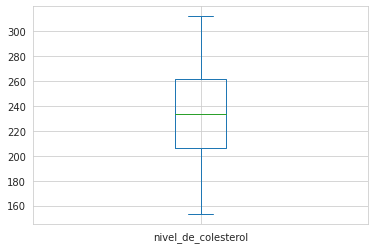

In [ ]:
d.nivel_de_colesterol.plot(kind="box")

##### variable dummy

In [ ]:
d.nunique()

sexo                              2
edad                              3
educacion                         4
fumador                           2
cigarros_por_dia                 33
toma_medicamentos                 2
ictus_prevalente                  2
prevalentHyp                      2
diabetes                          2
nivel_de_colesterol             160
presion_arterial_sistolica      155
presion_arterial_diastolica      91
imc                            1145
frecuencia_cardiaca              47
glucosa                          52
target                            2
dtype: int64

In [ ]:
#-------------------------------------------------
#-------------------------------------------------
lista_categoricas_1=lista_categoricas

lista_categoricas_1
posicion = None
for i, elemento in enumerate(lista_categoricas_1):
    if elemento == 'target':
        posicion = i
        break
if posicion is None:
    print("No se encontró el elemento.")
else:
    print("------------------------------------")
    print("considerando desde la posicion  cero")
    print("------------------------------------")
    print("La variable",elemento," está en la posición:", i)  

print(d[lista_categoricas_1].columns)
posicion=i

------------------------------------
considerando desde la posicion  cero
------------------------------------
La variable target  está en la posición: 8
Index(['sexo', 'edad', 'educacion', 'fumador', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'target'],
      dtype='object')


In [ ]:
print('longitud',len(lista_categoricas_1))                   # 
del lista_categoricas_1[posicion]                  # posicion 
print(lista_categoricas_1)                                   # se elimino target
#-------------------------------------------------
#-------------------------------------------------

longitud 9
['sexo', 'edad', 'educacion', 'fumador', 'toma_medicamentos', 'ictus_prevalente', 'prevalentHyp', 'diabetes']


In [ ]:
lista_categoricas_1

['sexo',
 'edad',
 'educacion',
 'fumador',
 'toma_medicamentos',
 'ictus_prevalente',
 'prevalentHyp',
 'diabetes']

In [ ]:
lista_numericas

['cigarros_por_dia',
 'nivel_de_colesterol',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa']

In [ ]:
d[lista_numericas].dtypes

cigarros_por_dia               float64
nivel_de_colesterol            float64
presion_arterial_sistolica     float64
presion_arterial_diastolica    float64
imc                            float64
frecuencia_cardiaca            float64
glucosa                        float64
dtype: object

In [ ]:
d[lista_categoricas_1].dtypes

sexo                    int64
edad                 category
educacion             float64
fumador                 int64
toma_medicamentos     float64
ictus_prevalente        int64
prevalentHyp            int64
diabetes                int64
dtype: object

In [ ]:
for col in d[lista_categoricas_1]:
    # Borrar la columna de tipo object
    Col4Dummy = d.pop(col)
    # Agregar las dummies a mi dataframe
    d = pd.concat([d, pd.get_dummies(Col4Dummy, prefix = col)], axis = 1)

In [ ]:
##~~~~~~~~~~~~~~~#############################################
##~~~~~~~~~~~~~~~MEJOR VISUALIZACION!!!
##~~~~~~~~~~~~~~~#############################################

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### se observa todas las columnas

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [ ]:
d.head(10)

,cigarros_por_dia,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target,sexo_0,sexo_1,edad_edad_c1,edad_edad_c2,edad_edad_c3,educacion_1.0,educacion_2.0,educacion_3.0,educacion_4.0,fumador_0,fumador_1,toma_medicamentos_0.0,toma_medicamentos_1.0,ictus_prevalente_0,ictus_prevalente_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,0.0,195.0,106.0,70.000,26.9700,80.0,77.0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
1,0.0,250.0,121.0,81.000,28.7300,95.0,76.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,20.0,245.0,127.5,80.000,25.3400,75.0,70.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
3,30.0,225.0,150.0,95.000,28.5800,65.0,103.0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0
4,23.0,285.0,130.0,84.000,23.1000,85.0,85.0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
5,0.0,228.0,175.0,104.575,30.3000,77.0,99.0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0
6,0.0,205.0,138.0,71.000,32.7715,60.0,85.0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0
7,20.0,312.0,100.0,71.000,21.6800,79.0,78.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
8,0.0,260.0,141.5,89.000,26.3600,76.0,79.0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0
9,30.0,225.0,162.0,104.575,23.6100,93.0,88.0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0


#### 6 Seleccion de Variables 

##### Seleccion boruta

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##~~~~~~~~~~~~~~~~~~##
## seleccion boruta ##
##~~~~~~~~~~~~~~~~~~##
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier(random_state=100)
boruta_selector = BorutaPy(rfc, n_estimators=100,perc = 50,alpha = 0.05,verbose=2,random_state=100)

x=d.drop('target',axis=1).values
y=d.target.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	14
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	14
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	14
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	14
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	15
I

In [ ]:
########### 
# tablita #
########### 
#
# se esocoge la quinta parte por perspicaz.
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(d.columns)}),
                              pd.DataFrame({'Importancia':list(boruta_selector.support_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,cigarros_por_dia,True
1,presion_arterial_sistolica,True
2,presion_arterial_diastolica,True
3,imc,True
4,frecuencia_cardiaca,True
5,glucosa,True
6,sexo_1,True
7,nivel_de_colesterol,True
8,edad_edad_c2,True
9,ictus_prevalente_0,False


In [ ]:
len(d.columns)

27

In [ ]:
list((ImportanciaVariables.Driver[0:9]))

['cigarros_por_dia',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa',
 'sexo_1',
 'nivel_de_colesterol',
 'edad_edad_c2']

In [ ]:
lista_boruta=list((ImportanciaVariables.Driver[0:9]))

##### Seleccion statsmodels

In [ ]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(d)
heart_df_constant.head()

,const,cigarros_por_dia,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target,sexo_0,sexo_1,edad_edad_c1,edad_edad_c2,edad_edad_c3,educacion_1.0,educacion_2.0,educacion_3.0,educacion_4.0,fumador_0,fumador_1,toma_medicamentos_0.0,toma_medicamentos_1.0,ictus_prevalente_0,ictus_prevalente_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,1.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
1,1.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
3,1.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0
4,1.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0


In [ ]:
heart_df_constant.columns

Index(['const', 'cigarros_por_dia', 'nivel_de_colesterol',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glucosa', 'target', 'sexo_0', 'sexo_1',
       'edad_edad_c1', 'edad_edad_c2', 'edad_edad_c3', 'educacion_1.0',
       'educacion_2.0', 'educacion_3.0', 'educacion_4.0', 'fumador_0',
       'fumador_1', 'toma_medicamentos_0.0', 'toma_medicamentos_1.0',
       'ictus_prevalente_0', 'ictus_prevalente_1', 'prevalentHyp_0',
       'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')

In [ ]:
heart_df_constant=heart_df_constant[['cigarros_por_dia', 'nivel_de_colesterol', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_0', 'sexo_1', 'edad_edad_c1', 'edad_edad_c2',
       'edad_edad_c3', 'educacion_1.0', 'educacion_2.0', 'educacion_3.0',
       'educacion_4.0', 'fumador_0', 'fumador_1', 'toma_medicamentos_0.0',
       'toma_medicamentos_1.0', 'ictus_prevalente_0', 'ictus_prevalente_1',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0', 'diabetes_1','target']]

In [ ]:
heart_df_constant.head(2)

,cigarros_por_dia,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,sexo_0,sexo_1,edad_edad_c1,edad_edad_c2,edad_edad_c3,educacion_1.0,educacion_2.0,educacion_3.0,educacion_4.0,fumador_0,fumador_1,toma_medicamentos_0.0,toma_medicamentos_1.0,ictus_prevalente_0,ictus_prevalente_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,target
0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0
1,0.0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0


In [ ]:
heart_df_constant.columns[:-1]

Index(['cigarros_por_dia', 'nivel_de_colesterol', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_0', 'sexo_1', 'edad_edad_c1', 'edad_edad_c2', 'edad_edad_c3',
       'educacion_1.0', 'educacion_2.0', 'educacion_3.0', 'educacion_4.0',
       'fumador_0', 'fumador_1', 'toma_medicamentos_0.0',
       'toma_medicamentos_1.0', 'ictus_prevalente_0', 'ictus_prevalente_1',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import scipy.stats as st
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, d)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(d.target,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.381606
         Iterations 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4219
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                  0.1044
Time:                        15:34:40   Log-Likelihood:                -1617.2
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 5.483e-69
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
cigarros_por_dia                0.0196      0.006      3.496      0.000       0.009       0.031
nivel_de_colesterol             0.0022      0.001      1.808      0.071      -0.000       0.004
presion_arterial_sistolica      0.0195      0.004      4.721      0.000       0.011       0.028
presion_arterial_diastolica    -0.0094      0.007     -1.405      0.160      -0.023       0.004
imc                             0.0004      0.014      0.028      0.977      -0.027       0.028
frecuencia_cardiaca            -0.0010      0.004     -0.238      0.812      -0.009       0.007
glucosa                         0.0052      0.004      1.334      0.182      -0.002       0.013
sexo_0                         -6.1792    3.1e+06  -1.99e-06      1.000   -6.08e+06    6.08e+06
sexo_1                         -5.6712    3.1e+06  -1.83e-06      1.000   -6.07e+06    6.07e+06
edad_edad_c1                   -2.2390        nan        nan        nan         nan         nan
edad_edad_c2                   -1.3479        nan        nan        nan         nan         nan
edad_edad_c3                   -0.9181        nan        nan        nan         nan         nan
educacion_1.0                   0.3969        nan        nan        nan         nan         nan
educacion_2.0                   0.1816        nan        nan        nan         nan         nan
educacion_3.0                   0.2888        nan        nan        nan         nan         nan
educacion_4.0                   0.3930        nan        nan        nan         nan         nan
fumador_0                      -0.3379        nan        nan        nan         nan         nan
fumador_1                      -0.3413        nan        nan        nan         nan         nan
toma_medicamentos_0.0           4.8347        nan        nan        nan         nan         nan
toma_medicamentos_1.0           5.1778        nan        nan        nan         nan         nan
ictus_prevalente_0             -0.6677        nan        nan        nan         nan         nan
ictus_prevalente_1              0.3501        nan        nan        nan         nan         nan
prevalentHyp_0                 -0.6232        nan        nan        nan         nan         nan
prevalentHyp_1                 -0.3848        nan        nan        nan         nan         nan
diabetes_0                     -0.8431   1.88e+06  -4.48e-07      1.000   -3.69e+06    3.69e+06
diabetes_1                     -0.1648   1.88e+06  -8.77e-08      1.000   -3.69e+06    3.69e+06
===============================================================================================
"""

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df_constant.target,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4230
Method:                           MLE   Df Model:                            7
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                 0.09985
Time:                        15:34:40   Log-Likelihood:                -1625.5
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 6.633e-74
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cigarros_por_dia               0.0190      0.004      5.030      0.000       0.012       0.026
presion_arterial_sistolica     0.0211      0.002      9.137      0.000       0.017       0.026
sexo_1                         0.4927      0.096      5.126      0.000       0.304       0.681
edad_edad_c2                   0.9589      0.121      7.932      0.000       0.722       1.196
edad_edad_c3                   1.4486      0.149      9.726      0.000       1.157       1.741
ictus_prevalente_1             1.1144      0.431      2.585      0.010       0.269       1.959
diabetes_0                    -5.8167      0.328    -17.712      0.000      -6.460      -5.173
diabetes_1                    -5.0048      0.399    -12.530      0.000      -5.788      -4.222
==============================================================================================
"""

In [ ]:
lista_seleccion=['cigarros_por_dia','presion_arterial_sistolica','sexo_1','edad_edad_c2','edad_edad_c3','ictus_prevalente_1','diabetes_0','diabetes_1','target']
len(lista_seleccion)

9

##### Seleccion fea

In [ ]:
# !pip install featurewiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
You supplied random_state = 100
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Shape of your Data Set loaded: (4238, 27)
    Loaded train data. Shape = (4238, 27)
    Some column names had special characters which were removed...
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No

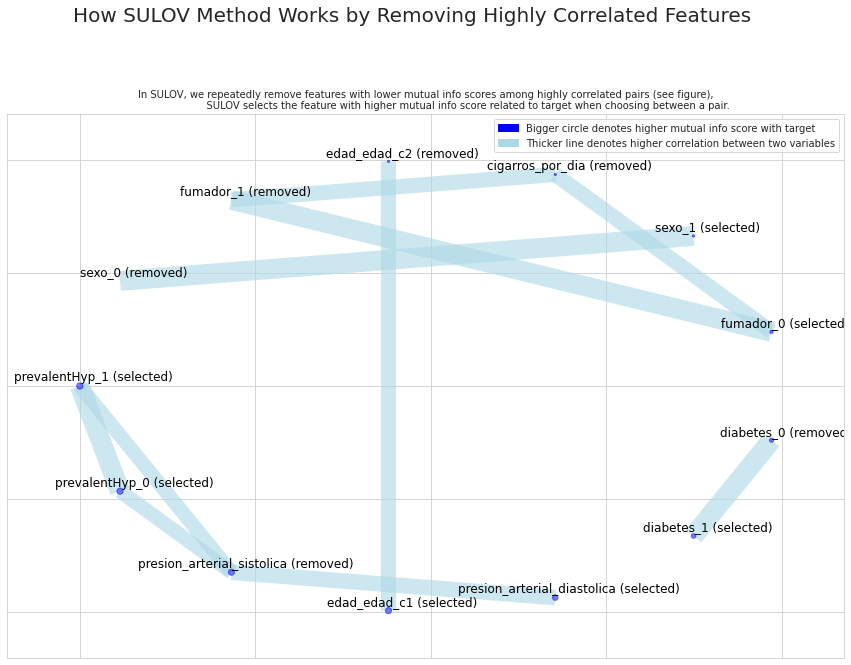

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 20
Final list of selected vars after SULOV = 20
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors = 20 
    XGBoost version using 1.6.2 as tree method: gpu_hist
Number of booster rounds = 100
        using 20 variables...
Regular XGBoost is crashing due to: [15:34:41] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7f30a654c459]
  [bt] (1) /usr/local/lib/python3.7/di

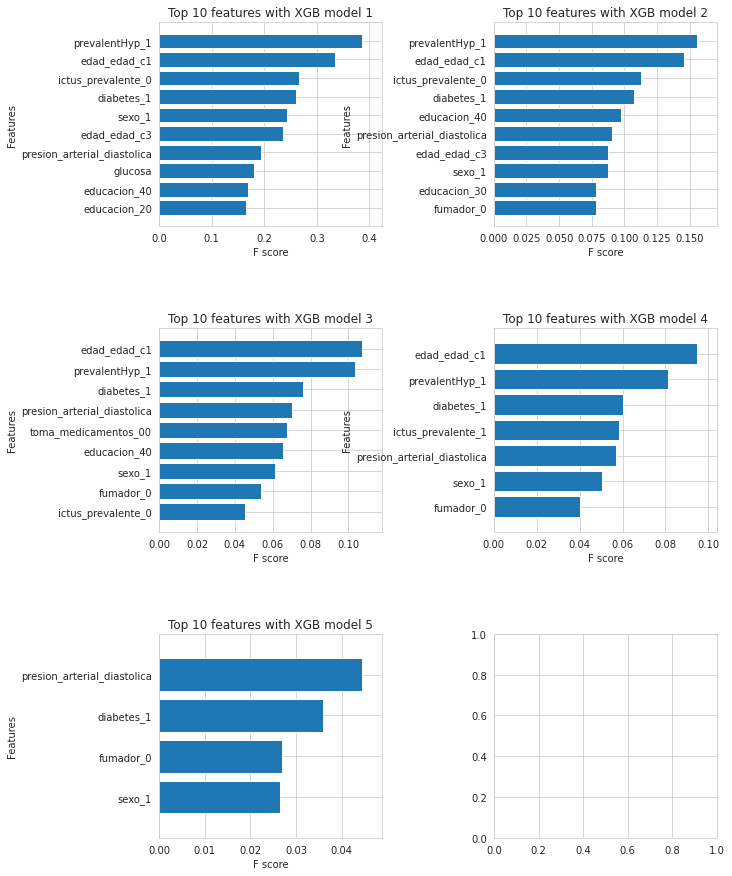

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['prevalentHyp_1', 'edad_edad_c1', 'ictus_prevalente_0', 'diabetes_1', 'sexo_1', 'edad_edad_c3', 'presion_arterial_diastolica', 'glucosa', 'educacion_40', 'educacion_20', 'educacion_30', 'fumador_0', 'toma_medicamentos_00', 'ictus_prevalente_1']
Total Time taken for featurewiz selection = 5 seconds
Output contains a list of 14 important features and a train dataframe


In [ ]:
target = 'target' 
features, train = featurewiz(d, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="",random_state=100)

In [ ]:
lista_featurewiz=(features)

In [ ]:
lista_featurewiz

['prevalentHyp_1',
 'edad_edad_c1',
 'ictus_prevalente_0',
 'diabetes_1',
 'sexo_1',
 'edad_edad_c3',
 'presion_arterial_diastolica',
 'glucosa',
 'educacion_4.0',
 'educacion_2.0',
 'educacion_3.0',
 'fumador_0',
 'toma_medicamentos_0.0',
 'ictus_prevalente_1']

In [ ]:
lista_featurewiz.append('target')

#### 7 Particion 

In [ ]:
lista_boruta.append('target')
 

In [ ]:
lista_featurewiz

['prevalentHyp_1',
 'edad_edad_c1',
 'ictus_prevalente_0',
 'diabetes_1',
 'sexo_1',
 'edad_edad_c3',
 'presion_arterial_diastolica',
 'glucosa',
 'educacion_4.0',
 'educacion_2.0',
 'educacion_3.0',
 'fumador_0',
 'toma_medicamentos_0.0',
 'ictus_prevalente_1',
 'target']

In [ ]:
d1=d[lista_boruta]

In [ ]:
x=d1.drop('target',axis=1)
y=d1.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=1)

In [ ]:
y_train.value_counts()/len(y_train)

0    0.848018
1    0.151982
Name: target, dtype: float64

In [ ]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
print(y.value_counts()/len(y))
print(y.value_counts())
print(1000/4238)

0    0.848018
1    0.151982
Name: target, dtype: float64
0    0.848113
1    0.151887
Name: target, dtype: float64
0    0.848042
1    0.151958
Name: target, dtype: float64
0    3594
1     644
Name: target, dtype: int64
0.23596035865974516


#### 8 Balanceo 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=2022)
X_res, y_res = under_sampler.fit_resample(x_train, y_train)
print('random_undersamplig')

print(y_res.value_counts())
print('-------------------------')


from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=2022)
X_res1, y_res1 = over_sampler.fit_resample(x_train, y_train)

print('random_oversamplig')

print(y_res1.value_counts())
print('-------------------------')

import random
random.seed(0)
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(random_state=2022)
X_res2, y_res2 = os_us.fit_resample(x_train, y_train)

print('SMOTETomek')

print(y_res2.value_counts())


random_undersamplig
0    483
1    483
Name: target, dtype: int64
-------------------------
random_oversamplig
0    2695
1    2695
Name: target, dtype: int64
-------------------------
SMOTETomek
0    2663
1    2663
Name: target, dtype: int64


-RandomOversamplig  
*  X_res1, y_res1

-SMOTETomek         
* X_res2, y_res2

-RandomUnderSampler : 
* X_res, y_res

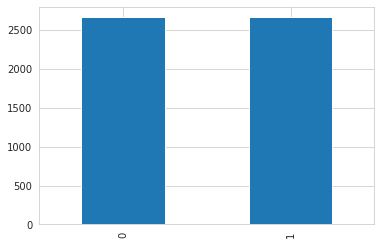

In [ ]:
 y_res2.value_counts().plot.bar()

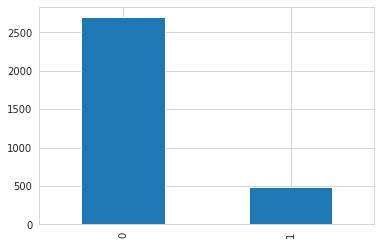

In [ ]:
y_train.value_counts().plot.bar()

#### Modelos de Machine Learning
- Logistic Regression
- Naive Bayes
- Random Forest Classifier
- Extreme Gradient Boost
- K-Nearest Neighbour
- Decision Tree
- Support Vector Machine

#### 9 Modelos

In [ ]:
Counter(y_train)

Counter({0: 2695, 1: 483})

In [ ]:
Counter(y_res2)

Counter({0: 2663, 1: 2663})

In [ ]:
#help(LogisticRegression)

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter = 1000,solver='liblinear',random_state=0)
lr.fit(X_res2, y_res2)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[570 329]
 [ 67  94]]


Accuracy of Logistic Regression: 62.64150943396226 

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       899
           1       0.22      0.58      0.32       161

    accuracy                           0.63      1060
   macro avg       0.56      0.61      0.53      1060
weighted avg       0.79      0.63      0.68      1060



In [ ]:
m1 = 'DecisionTreeClassifier'
arbol = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best',random_state=0)
arbol.fit(X_res2, y_res2)
arbol_predict = arbol.predict(x_test)
arbol_conf_matrix = confusion_matrix(y_test, arbol_predict)
arbol_acc_score = accuracy_score(y_test, arbol_predict)
print("confussion matrix")
print(arbol_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",arbol_acc_score*100,'\n')
print(classification_report(y_test,arbol_predict))

confussion matrix
[[508 391]
 [ 58 103]]


Accuracy of DecisionTreeClassifier: 57.64150943396227 

              precision    recall  f1-score   support

           0       0.90      0.57      0.69       899
           1       0.21      0.64      0.31       161

    accuracy                           0.58      1060
   macro avg       0.55      0.60      0.50      1060
weighted avg       0.79      0.58      0.64      1060



In [ ]:
m1 = 'RandomForestClassifier'
rdn = RandomForestClassifier(max_features='auto',criterion='gini',n_estimators=100,max_depth=3,random_state=0)
rdn.fit(X_res2, y_res2)
rdn_predict = rdn.predict(x_test)
rdn_conf_matrix = confusion_matrix(y_test, rdn_predict)
rdn_acc_score = accuracy_score(y_test, rdn_predict)
print("confussion matrix")
print(rdn_conf_matrix)
print("\n")
print("Accuracy of RandomForestClassifier:",rdn_acc_score*100,'\n')
print(classification_report(y_test,rdn_predict))

confussion matrix
[[617 282]
 [ 73  88]]


Accuracy of RandomForestClassifier: 66.50943396226415 

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       899
           1       0.24      0.55      0.33       161

    accuracy                           0.67      1060
   macro avg       0.57      0.62      0.55      1060
weighted avg       0.79      0.67      0.71      1060



In [ ]:
m1 = 'XGBClassifier'
#max_features='sqrt',criterion='gini',n_estimators=120,max_depth=6,min_samples_split=0.1,min_sample_leaf=0.2,max_leaf_nodes=10
xgb = XGBClassifier(random_state=0)
xgb.fit(X_res2, y_res2)
xgb_predict = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of XGBClassifier:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predict))

confussion matrix
[[804  95]
 [137  24]]


Accuracy of XGBClassifier: 78.11320754716982 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       899
           1       0.20      0.15      0.17       161

    accuracy                           0.78      1060
   macro avg       0.53      0.52      0.52      1060
weighted avg       0.76      0.78      0.77      1060



In [ ]:
m1 = 'KNeighborsClassifier'
kn = KNeighborsClassifier()
kn.fit(X_res2, y_res2)
kn_predict = xgb.predict(x_test)
kn_conf_matrix = confusion_matrix(y_test, kn_predict)
kn_acc_score = accuracy_score(y_test, kn_predict)
print("confussion matrix")
print(kn_conf_matrix)
print("\n")
print("Accuracy of KNeighborsClassifier:",kn_acc_score*100,'\n')
print(classification_report(y_test,kn_predict))

confussion matrix
[[804  95]
 [137  24]]


Accuracy of KNeighborsClassifier: 78.11320754716982 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       899
           1       0.20      0.15      0.17       161

    accuracy                           0.78      1060
   macro avg       0.53      0.52      0.52      1060
weighted avg       0.76      0.78      0.77      1060



In [ ]:
m1 = 'SVC'
svc = SVC(random_state=0)
svc.fit(X_res2, y_res2)
svc_predict = xgb.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of SVC:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))

confussion matrix
[[804  95]
 [137  24]]


Accuracy of SVC: 78.11320754716982 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       899
           1       0.20      0.15      0.17       161

    accuracy                           0.78      1060
   macro avg       0.53      0.52      0.52      1060
weighted avg       0.76      0.78      0.77      1060



In [ ]:
#--------------------#
# lista seleccionada #
#--------------------#
print(len(lista_featurewiz))
lista_featurewiz[0:13] # sin la target


15


['prevalentHyp_1',
 'edad_edad_c1',
 'ictus_prevalente_0',
 'diabetes_1',
 'sexo_1',
 'edad_edad_c3',
 'presion_arterial_diastolica',
 'glucosa',
 'educacion_4.0',
 'educacion_2.0',
 'educacion_3.0',
 'fumador_0',
 'toma_medicamentos_0.0']

In [ ]:
print(len(d1.columns))
d1.columns

10


Index(['cigarros_por_dia', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2', 'target'],
      dtype='object')

In [ ]:
rdn.feature_importances_

array([0.09624332, 0.41978788, 0.14566986, 0.09359205, 0.03681523,
       0.05068054, 0.00075074, 0.07979685, 0.07666354])

In [ ]:
# Seleccion por Random Forest
#
# se esocoge la quinta parte por perspicaz.
TablaImportancia = pd.concat([pd.DataFrame({'Driver':(lista_boruta[0:9])}),
                              pd.DataFrame({'Importancia':list(rdn.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,presion_arterial_sistolica,0.419788
1,presion_arterial_diastolica,0.145670
2,cigarros_por_dia,0.096243
3,imc,0.093592
4,nivel_de_colesterol,0.079797
5,edad_edad_c2,0.076664
6,glucosa,0.050681
7,frecuencia_cardiaca,0.036815
8,sexo_1,0.000751


In [ ]:
len(lista_boruta)

10

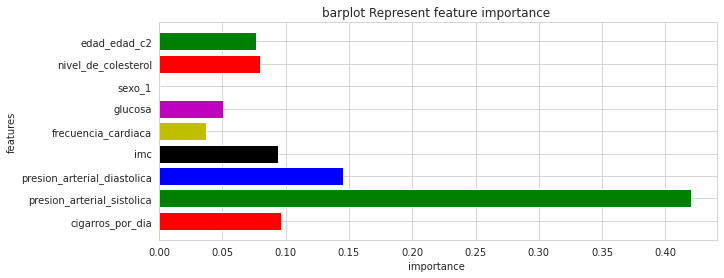

In [ ]:
imp_feature = pd.DataFrame({'Feature':(lista_boruta[0:9]), 'Importance': rdn.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

#### 10 Stacking

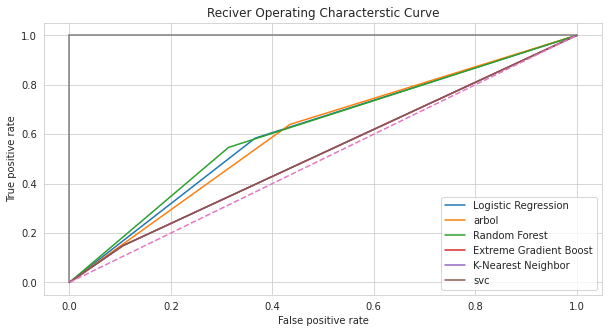

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
arbol_false_positive_rate,arbol_true_positive_rate,arbol_threshold = roc_curve(y_test,arbol_predict)
rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(y_test,rdn_predict)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,kn_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)

 
 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(arbol_false_positive_rate,arbol_true_positive_rate,label='arbol')
plt.plot(rdn_false_positive_rate,rdn_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='svc')

 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','arbol','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbor','svc'], 'Accuracy': [lr_acc_score*100,
                    arbol_acc_score*100,rdn_acc_score*100,xgb_acc_score*100,kn_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,62.641509
1,arbol,57.641509
2,Random Forest,66.509434
3,Extreme Gradient Boost,78.113208
4,K-Nearest Neighbor,78.113208
5,svc,78.113208


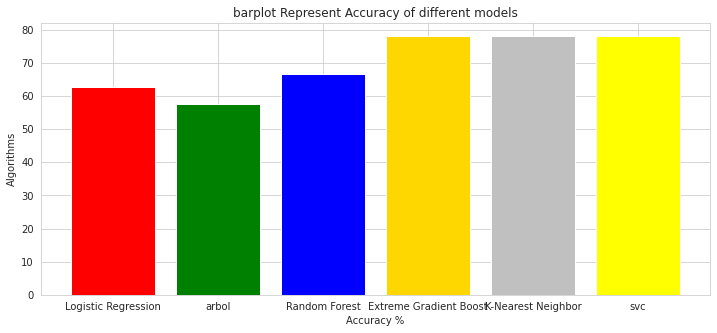

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
from mlxtend.classifier import StackingCVClassifier

In [ ]:
# help(StackingCVClassifier)

In [ ]:
scv=StackingCVClassifier(classifiers=[rdn,arbol],meta_classifier= rdn)

In [ ]:
scv.fit(X_res2.values, y_res2.values)

StackingCVClassifier(classifiers=[RandomForestClassifier(max_depth=3,
                                                         random_state=0),
                                  DecisionTreeClassifier(max_depth=4,
                                                         random_state=0)],
                     meta_classifier=RandomForestClassifier(max_depth=3,
                                                            random_state=0))

In [ ]:
#X_res2, y_res2
y_res2.head(2)

0    0
1    0
Name: target, dtype: int64

In [ ]:
scv_predicted = scv.predict(x_test.values)
scv_conf_matrix = confusion_matrix(y_test.values, scv_predicted)
scv_acc_score = accuracy_score(y_test.values, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test.values,scv_predicted))

confussion matrix
[[617 282]
 [ 73  88]]


Accuracy of StackingCVClassifier: 66.50943396226415 

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       899
           1       0.24      0.55      0.33       161

    accuracy                           0.67      1060
   macro avg       0.57      0.62      0.55      1060
weighted avg       0.79      0.67      0.71      1060



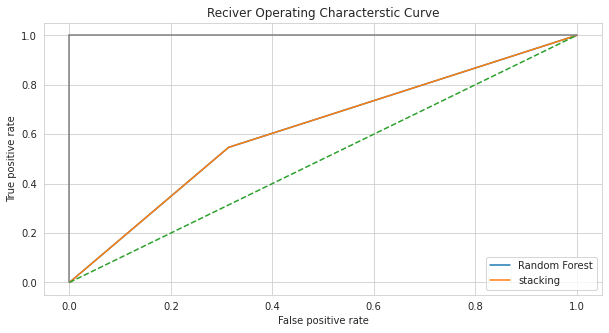

In [ ]:

rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(y_test,rdn_predict)                                                             

#
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted) 
 
 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(rdn_false_positive_rate,rdn_true_positive_rate,label='Random Forest')

#
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='stacking')
 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
###########
# forma 2 #
###########

from sklearn import metrics as metrics
#X_res2, y_res2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#            Metricas              #                                
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=scv.predict(X_res2) # Prediccion sobre el train
y_pred_test= scv.predict(x_test) # Prediccion sobre el test


#--------------------------------------------------------------#


# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_res2,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_res2,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_res2,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_res2,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[1950  713]
 [1146 1517]]
Matriz confusion: Test
[[617 282]
 [ 73  88]]
Accuracy: Train
0.6509575666541495
Accuracy: Test
0.6650943396226415
Precision: Train
0.6802690582959642
Precision: Test
0.23783783783783785
Recall: Train
0.5696582801351859
Recall: Test
0.546583850931677


#### Data_final 
- **lista_boruta**
-'cigarros_por_dia',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa',
 'sexo_1',
 'nivel_de_colesterol',
 'edad_edad_c2

In [ ]:
d[lista_boruta].columns

Index(['cigarros_por_dia', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2', 'target'],
      dtype='object')

In [ ]:
lista_fin=['cigarros_por_dia', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2']
x1=d[lista_fin]       

In [ ]:
x1.head(5)

,cigarros_por_dia,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,sexo_1,nivel_de_colesterol,edad_edad_c2
0,0.0,106.0,70.0,26.97,80.0,77.0,1,195.0,0
1,0.0,121.0,81.0,28.73,95.0,76.0,0,250.0,1
2,20.0,127.5,80.0,25.34,75.0,70.0,1,245.0,1
3,30.0,150.0,95.0,28.58,65.0,103.0,0,225.0,0
4,23.0,130.0,84.0,23.10,85.0,85.0,0,285.0,1


In [ ]:
#x.drop('target_predicho',axis=1,inplace=True)
x1['target_predicho']=scv.predict(x1)

In [ ]:
x1['target']=d.target
x1.columns
print(x1.target_predicho.value_counts())
print(x1.target.value_counts())

0    2896
1    1342
Name: target_predicho, dtype: int64
0    3594
1     644
Name: target, dtype: int64


In [ ]:
x1.groupby(['target']).agg({'target_predicho':'count'})

,target_predicho
target,
0,3594
1,644


In [ ]:
import pandas as pd
my_crosstab = pd.crosstab(index=x1["target"], 
                            columns=x1["target_predicho"],
                             margins=False)   # Include row and column totals
my_crosstab

target_predicho,0,1
target,,
0,2591,1003
1,305,339


#### Graficos Finales

In [ ]:
print(len(lista_boruta))
print(lista_boruta)
print(lista_boruta[0:9])

10
['cigarros_por_dia', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2', 'target']
['cigarros_por_dia', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2']


In [ ]:
(x1[lista_boruta[0:9]]).dtypes

cigarros_por_dia               float64
presion_arterial_sistolica     float64
presion_arterial_diastolica    float64
imc                            float64
frecuencia_cardiaca            float64
glucosa                        float64
sexo_1                           uint8
nivel_de_colesterol            float64
edad_edad_c2                     uint8
dtype: object

##### target y target_predicho

In [ ]:
print("--------------------------")
print('esto dice la data original')
print("--------------------------")
print(x1.target.value_counts())
print("-------------------")
print('esto dice el modelo')
print("-------------------")
print(x1.target_predicho.value_counts())

--------------------------
esto dice la data original
--------------------------
0    3594
1     644
Name: target, dtype: int64
-------------------
esto dice el modelo
-------------------
0    2896
1    1342
Name: target_predicho, dtype: int64


In [ ]:
import pandas as pd
my_crosstab = pd.crosstab(index=x1["target"], 
                            columns=x1["target_predicho"],
                             margins=True)   # Include row and column totals
my_crosstab

target_predicho,0,1,All
target,,,
0,2591,1003,3594
1,305,339,644
All,2896,1342,4238


In [ ]:
x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'})

target_predicho
target target_predicho                 
0      0                           2591
       1                           1003
1      0                            305
       1                            339

In [ ]:
np.array(x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'}))

array([[2591],
       [1003],
       [ 305],
       [ 339]])

**************************
        target            
**************************
--------------------------
        comparacion       
--------------------------


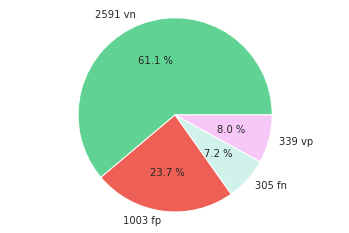

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('        target            ')
print("**************************")

print("--------------------------")
print('        comparacion       ')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["2591 vn ","1003 fp","305 fn","339 vp"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()


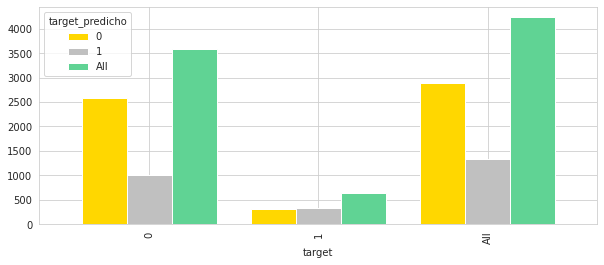

In [ ]:
coloresMedallas = ['#FFD700','#C0C0C0',"#60D394"]

my_crosstab.plot(kind = 'bar',
             width=0.8,
             figsize=(10,4),
             color = coloresMedallas)

##### sexo 

In [ ]:
#--------#
# paso 1 #
#--------#
x1.sexo_1.unique()#femenino


array([1, 0], dtype=uint8)

In [ ]:
#--------#
# paso 2 #
#--------#

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

print(x1.sexo_1.value_counts())

print("-----------")
print('equivalente')
print("-----------")

x1.groupby(['sexo_1']).agg({'target':'count'})
        #cualitativa       #cuantitativa

--------------------------
esto dice la data original
--------------------------
0    2419
1    1819
Name: sexo_1, dtype: int64
-----------
equivalente
-----------


,target
sexo_1,
0,2419
1,1819


In [ ]:
#--------#
# paso 3 #
#--------#
x1.groupby(['target_predicho','sexo_1']).count()

# hombre : 1201 + 618 =1819
# mujer  : 1695 + 724 =2419

cigarros_por_dia  presion_arterial_sistolica  \
target_predicho sexo_1                                                 
0               0                   1695                        1695   
                1                   1201                        1201   
1               0                    724                         724   
                1                    618                         618   

                        presion_arterial_diastolica   imc  \
target_predicho sexo_1                                      
0               0                              1695  1695   
                1                              1201  1201   
1               0                               724   724   
                1                               618   618   

                        frecuencia_cardiaca  glucosa  nivel_de_colesterol  \
target_predicho sexo_1                                                      
0               0                      1695     1695                 1695   
                1                      1201     1201                 1201   
1               0                       724      724                  724   
                1                       618      618                  618   

                        edad_edad_c2  target  
target_predicho sexo_1                        
0               0               1695    1695  
                1               1201    1201  
1               0                724     724  
                1                618     618

In [ ]:
x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})

target_predicho
target_predicho sexo_1                 
0               0                  1695
                1                  1201
1               0                   724
                1                   618

In [ ]:
#-------------------#
# covertir en numpy #
#-------------------#
np.array(x1.groupby(['target_predicho','sexo_1']).agg({'target':'count'}))

array([[1695],
       [1201],
       [ 724],
       [ 618]])

**************************
           sexo           
**************************
--------------------------
esto dice la data original
--------------------------


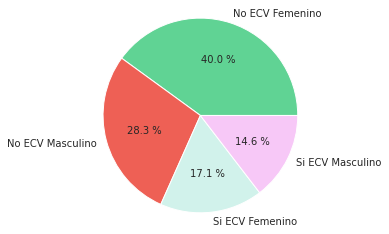

-------------------
esto dice el modelo
-------------------


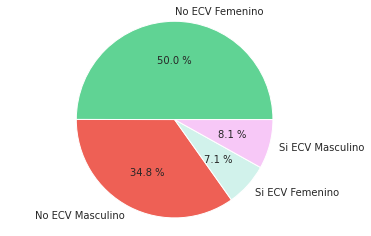

In [ ]:
#--------#
# paso 4 #
#--------#
import matplotlib.pyplot as plt

print("**************************")
print('           sexo           ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

numero = np.array(x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})) # 1=masculino
nombres = ["No ECV Femenino","No ECV Masculino","Si ECV Femenino","Si ECV Masculino"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")

numero = np.array(x1.groupby(['target','sexo_1']).agg({'target':'count'})) # 1=masculino
nombres = ["No ECV Femenino","No ECV Masculino","Si ECV Femenino","Si ECV Masculino"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
print(1695/4238*100)
print(1201/4238*100)
print(724/4238*100)
print(618/4238*100)
print('suma:',1695+	1201+724+	618)

39.995280792826804
28.338839075035395
17.08352996696555
14.582350165172251
suma: 4238


In [ ]:
x1.groupby(['target','sexo_1']).agg({'target':'count'})

target
target sexo_1        
0      0         2118
       1         1476
1      0          301
       1          343

******
 sexo 
******
--------------------------
esto dice la data original
--------------------------


<Figure size 2400x800 with 0 Axes>

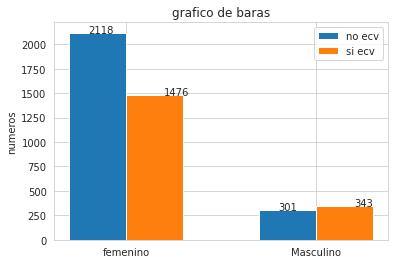

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("******")
print(' sexo ')
print("******")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")


etiquetas=["femenino","Masculino"]
valores=[2118,301]
valores2=[1476,343]
#
co=np.arange(len(valores))
an=0.3
#

#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})

target_predicho
target_predicho sexo_1                 
0               0                  1695
                1                  1201
1               0                   724
                1                   618

******
 sexo 
******
-------------------
esto dice el modelo
-------------------


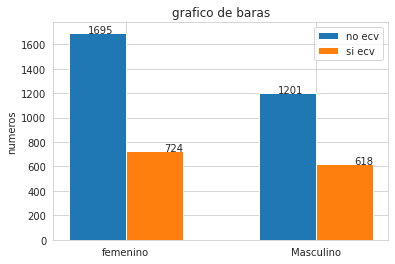

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("******")
print(' sexo ')
print("******")

print("-------------------")
print('esto dice el modelo')
print("-------------------")


etiquetas=["femenino","Masculino"]
valores=[1695,1201]
valores2=[724,618]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

##### edad_edad_c2

In [ ]:
#--------#
# paso 1 #
#--------#
d.edad_edad_c2.unique()

array([0, 1], dtype=uint8)

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})

target_predicho
target_predicho edad_edad_c2                 
0               0                        1505
                1                        1391
1               0                         661
                1                         681

In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'}))

array([[1505],
       [1391],
       [ 661],
       [ 681]])

**************************
           edad           
**************************
--------------------------
esto dice la data original
--------------------------


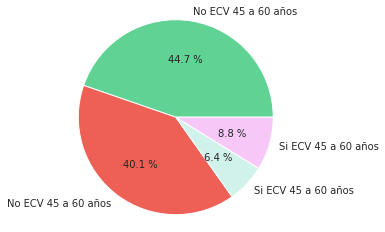

-------------------
esto dice el modelo
-------------------


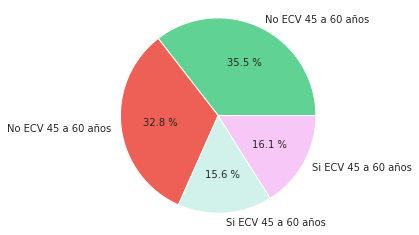

In [ ]:
#30,45,60,75
print("**************************")
print('           edad           ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target','edad_edad_c2']).agg({'target':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["No ECV 45 a 60 años","No ECV 45 a 60 años","Si ECV 45 a 60 años","Si ECV 45 a 60 años"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["No ECV 45 a 60 años","No ECV 45 a 60 años","Si ECV 45 a 60 años","Si ECV 45 a 60 años"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target','edad_edad_c2']).agg({'target':'count'})

target
target edad_edad_c2        
0      0               1895
       1               1699
1      0                271
       1                373

**************
 edad_edad_c2 
**************
--------------------------
esto dice la data original
--------------------------


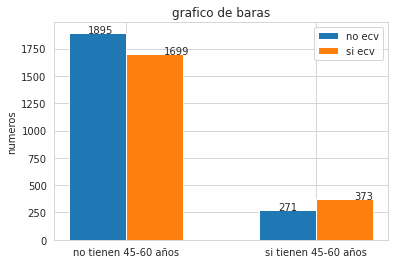

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("**************")
print(' edad_edad_c2 ')
print("**************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")


etiquetas=["no tienen 45-60 años","si tienen 45-60 años"]
valores=[1895,271]
valores2=[1699,373]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})

target_predicho
target_predicho edad_edad_c2                 
0               0                        1505
                1                        1391
1               0                         661
                1                         681

**************
 edad_edad_c2 
**************
-------------------
esto dice el modelo
-------------------


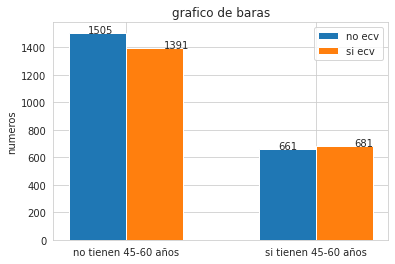

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("**************")
print(' edad_edad_c2 ')
print("**************")

print("-------------------")
print('esto dice el modelo')
print("-------------------")


etiquetas=["no tienen 45-60 años","si tienen 45-60 años"]
valores=[1505,661]
valores2=[1391,681]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

##### cigarros por dia

In [ ]:
#--------#
# paso 1 #
#--------#
d.cigarros_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'})

,cigarros_por_dia
target_predicho,
0,2896
1,1342


In [ ]:
x1.groupby(['target']).agg({'cigarros_por_dia':'count'})

,cigarros_por_dia
target,
0,3594
1,644


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'}))

array([[2896],
       [1342]])

**************************
   cigarros por dia       
**************************
--------------------------
esto dice la data original
--------------------------


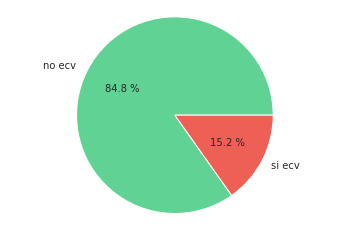

-------------------
esto dice el modelo
-------------------


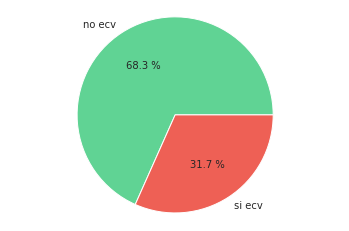

In [ ]:
#30,45,60,75
print("**************************")
print('   cigarros por dia       ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'cigarros_por_dia':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### Presion arterial sistolica

In [ ]:
#--------#
# paso 1 #
#--------#
x1.presion_arterial_sistolica.unique()

array([106. , 121. , 127.5, 150. , 130. , 175. , 138. , 100. , 141.5,
       162. , 133. , 131. , 142. , 124. , 114. , 140. , 112. , 122. ,
       139. , 108. , 123.5, 148. , 132. , 137.5, 102. , 110. , 115. ,
       134. , 147. , 124.5, 153.5, 160. , 153. , 111. , 116.5,  97. ,
       119. , 116. , 156.5, 145. , 143.5, 158. , 157. , 126.5, 136. ,
       154. , 107. , 112.5, 164.5, 138.5, 155. , 151. , 152. , 113. ,
       132.5, 126. , 123. , 141. , 135. , 127. , 160.5, 105. , 109. ,
       128. , 118. , 109.5, 117.5, 149. , 136.5, 125. , 121.5, 173. ,
       144. , 129.5, 117. , 144.5, 170. , 137. , 119.5, 143. , 166. ,
       139.5, 129. , 159. , 130.5, 107.5, 168. , 146. , 174. , 122.5,
        98. , 131.5, 101. , 158.5, 151.5,  97.5, 120. , 157.5, 140.5,
       171. , 156. , 165. , 146.5, 113.5, 152.5, 162.5, 108.5, 103. ,
       145.5, 134.5, 115.5, 118.5, 174.5, 163. , 164. , 120.5,  98.5,
       161. , 168.5, 163.5, 128.5, 167. , 167.5, 172.5, 147.5, 142.5,
       159.5, 102.5,

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'})

,presion_arterial_sistolica
target_predicho,
0,2896
1,1342


In [ ]:
x1.groupby(['target']).agg({'presion_arterial_sistolica':'count'})

,presion_arterial_sistolica
target,
0,3594
1,644


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_sistolica
**************************
--------------------------
esto dice la data original
--------------------------


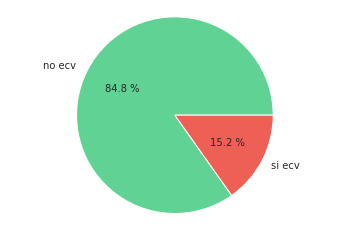

-------------------
esto dice el modelo
-------------------


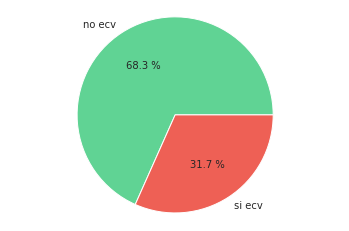

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_sistolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'presion_arterial_sistolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### presion_arterial_diastolica

In [ ]:
#--------#
# paso 1 #
#--------#
x1.presion_arterial_diastolica.unique()

array([ 70.   ,  81.   ,  80.   ,  95.   ,  84.   , 104.575,  71.   ,
        89.   ,  76.   ,  88.   ,  94.   ,  64.   ,  90.   ,  78.   ,
        84.5  ,  70.5  ,  77.5  ,  82.   ,  68.   ,  72.5  ,  91.   ,
        85.5  ,  85.   ,  82.5  ,  74.   ,  92.5  , 102.   ,  98.   ,
       101.   ,  73.   ,  92.   ,  83.5  ,  63.   ,  69.   ,  93.   ,
        66.   ,  75.   ,  79.   ,  87.   ,  99.   ,  60.   ,  67.5  ,
        86.5  , 104.   ,  86.   ,  61.5  ,  71.5  ,  76.5  ,  77.   ,
        88.5  ,  96.   ,  97.   , 100.   ,  81.5  ,  80.5  ,  61.   ,
        83.   ,  67.   ,  74.5  ,  66.5  ,  65.   ,  72.   ,  99.5  ,
        78.5  , 104.5  ,  89.5  ,  75.5  ,  97.5  ,  69.5  ,  95.5  ,
        96.5  ,  64.5  ,  68.5  ,  98.5  ,  62.   , 103.   ,  73.5  ,
        87.5  ,  93.5  ,  90.5  ,  62.5  ,  94.5  ,  79.5  ,  91.5  ,
       102.5  ,  65.5  , 103.5  ,  63.5  , 100.5  , 101.5  ,  60.5  ])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'})

,presion_arterial_diastolica
target_predicho,
0,2896
1,1342


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_diastolica
**************************
--------------------------
esto dice la data original
--------------------------


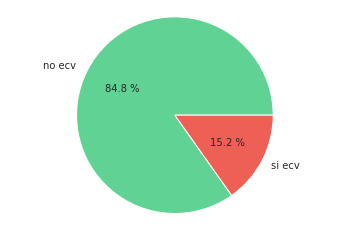

-------------------
esto dice el modelo
-------------------


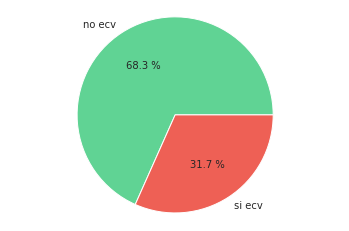

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_diastolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'presion_arterial_diastolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### imc

In [ ]:
#--------#
# paso 1 #
#--------#
x1.imc.unique()

array([26.97, 28.73, 25.34, ..., 27.11, 30.48, 26.7 ])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'imc':'count'})

,imc
target_predicho,
0,2896
1,1342


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'imc':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_diastolica
**************************
--------------------------
esto dice la data original
--------------------------


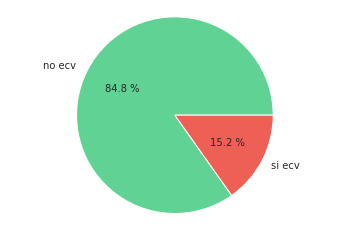

-------------------
esto dice el modelo
-------------------


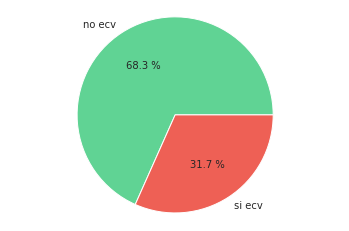

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_diastolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'imc':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'imc':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
lista_boruta

['cigarros_por_dia',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa',
 'sexo_1',
 'nivel_de_colesterol',
 'edad_edad_c2',
 'target']